In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df0=pd.read_csv('siconv_plano_aplicacao_detalhado.csv',sep=';',usecols=['ID_PROPOSTA','TIPO_DESPESA_ITEM'])

In [4]:
df0=df0.drop(df0[(df0.TIPO_DESPESA_ITEM!='OBRA')].index)

In [5]:
df0.drop_duplicates(subset='ID_PROPOSTA',inplace=True)

In [6]:
df1=pd.read_csv('siconv_convenio.csv',sep=';',thousands='.', decimal=',',usecols=['NR_CONVENIO','ID_PROPOSTA','MES','ANO','DIA_FIM_VIGENC_CONV','DIA_FIM_VIGENC_ORIGINAL_CONV','DIA_INIC_VIGENC_CONV','VL_GLOBAL_CONV','VL_CONTRAPARTIDA_CONV'])

In [7]:
df1=df1.merge(df0,on='ID_PROPOSTA')#planilha só com obras

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93894 entries, 0 to 93893
Data columns (total 10 columns):
NR_CONVENIO                     93894 non-null int64
ID_PROPOSTA                     93894 non-null int64
MES                             81332 non-null float64
ANO                             81332 non-null float64
DIA_INIC_VIGENC_CONV            93894 non-null object
DIA_FIM_VIGENC_CONV             93894 non-null object
DIA_FIM_VIGENC_ORIGINAL_CONV    93894 non-null object
VL_GLOBAL_CONV                  93894 non-null float64
VL_CONTRAPARTIDA_CONV           93894 non-null float64
TIPO_DESPESA_ITEM               93894 non-null object
dtypes: float64(4), int64(2), object(4)
memory usage: 7.9+ MB


In [9]:
df1[list(df1.filter(like='DIA'))]=df1[list(df1.filter(like='DIA'))].apply(pd.to_datetime,format='%d/%m/%Y')

In [10]:
df2=pd.read_csv('siconv_proposta.csv',sep=';',usecols=['ID_PROPOSTA','UF_PROPONENTE','COD_MUNIC_IBGE'])

In [11]:
df3=pd.merge(df1,df2,on='ID_PROPOSTA')

In [12]:
df4=df3[(df3.DIA_FIM_VIGENC_CONV>df3.DIA_FIM_VIGENC_ORIGINAL_CONV)]

In [13]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49550 entries, 10 to 93748
Data columns (total 12 columns):
NR_CONVENIO                     49550 non-null int64
ID_PROPOSTA                     49550 non-null int64
MES                             49548 non-null float64
ANO                             49548 non-null float64
DIA_INIC_VIGENC_CONV            49550 non-null datetime64[ns]
DIA_FIM_VIGENC_CONV             49550 non-null datetime64[ns]
DIA_FIM_VIGENC_ORIGINAL_CONV    49550 non-null datetime64[ns]
VL_GLOBAL_CONV                  49550 non-null float64
VL_CONTRAPARTIDA_CONV           49550 non-null float64
TIPO_DESPESA_ITEM               49550 non-null object
UF_PROPONENTE                   49550 non-null object
COD_MUNIC_IBGE                  49550 non-null int64
dtypes: datetime64[ns](3), float64(4), int64(3), object(2)
memory usage: 4.9+ MB


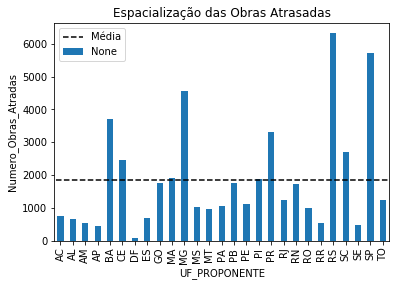

In [14]:
NUM_ABS_UF=(df4.groupby(['UF_PROPONENTE']).size())
NUM_ABS_UF.plot(kind='bar')
plt.hlines(NUM_ABS_UF.mean(),-1,len(NUM_ABS_UF),linestyles='dashed',label='Média')
plt.ylabel('Numero_Obras_Atradas')
plt.title('Espacialização das Obras Atrasadas')
plt.ylabel('Numero_Obras_Atradas')
plt.title('Espacialização das Obras Atrasadas')
plt.legend(loc=2)
plt.savefig('OBRAS_ATRASADO_POR_UF.png')

In [15]:
NUM_TOT_UF=(df3.groupby(['UF_PROPONENTE']).size())

In [16]:
NUM_TOT_UF.index

Index(['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS',
       'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC',
       'SE', 'SP', 'TO'],
      dtype='object', name='UF_PROPONENTE')

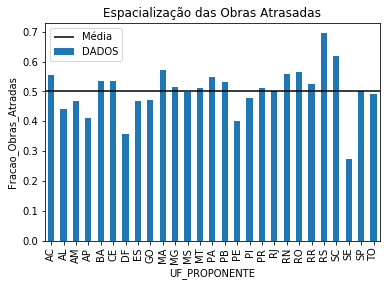

In [17]:
NUM_REL_UF=NUM_ABS_UF.div(NUM_TOT_UF)
NUM_REL_UF.plot(kind='bar',label='DADOS')
plt.hlines(NUM_REL_UF.mean(),-1,len(NUM_REL_UF),label='Média')
plt.ylabel('Fracao_Obras_Atradas')
plt.title('Espacialização das Obras Atrasadas')
plt.legend(loc=2)
plt.savefig('OBRAS_ATRASADO_REL_POR_UF.png')

0.7899300993969853 [2008. 2009. 2010. 2011. 2012. 2013. 2014. 2015. 2016.] [0.7899301 0.7899301 0.7899301 0.7899301 0.7899301 0.7899301 0.7899301
 0.7899301 0.7899301]


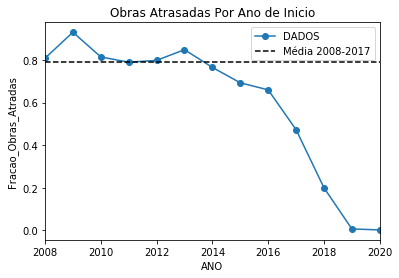

In [18]:
NUM_REL_ANO=df4.groupby(['ANO']).size().div(df3.groupby(['ANO']).size())
NUM_REL_ANO.plot(label='DADOS',marker='o')
temp1=np.asarray(NUM_REL_ANO.index)
temp2=np.asarray(NUM_REL_ANO)
temp2=np.full(len(temp2),np.mean(temp2[0:-4]))
temp2=temp2.flatten()
plt.plot(temp1,temp2,label='Média 2008-2017',linestyle='dashed',color='black')
plt.ylabel('Fracao_Obras_Atradas')
plt.title('Obras Atrasadas Por Ano de Inicio')
plt.legend()
plt.savefig('OBRAS_ATRASADO_REL_POR_ANO.png')
print(np.mean(temp2[0:-4]),temp1[0:-4],np.full(len(temp1[0:-4]),np.mean(temp2[0:-4])))

In [19]:
df4['DIAS_ATRASO_INT']=df4.DIA_FIM_VIGENC_CONV-df4.DIA_FIM_VIGENC_ORIGINAL_CONV
df4['DIAS_ATRASO_INT']=pd.to_numeric(df4['DIAS_ATRASO_INT'].dt.days)
df4['DIAS_OBRA_INT']=df4.DIA_FIM_VIGENC_ORIGINAL_CONV-df4.DIA_INIC_VIGENC_CONV
df4['DIAS_OBRA_INT']=pd.to_numeric(df4.DIAS_OBRA_INT.dt.days)
df4['DIAS_ATRASO_REL']=df4['DIAS_ATRASO_INT']/df4['DIAS_OBRA_INT']

/home/estevan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/estevan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/estevan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

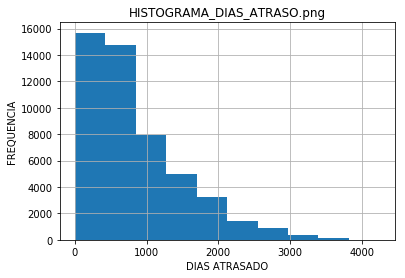

In [20]:
df4[(df4.DIAS_ATRASO_INT>0)]['DIAS_ATRASO_INT'].hist()
plt.xlabel('DIAS ATRASADO')
plt.ylabel('FREQUENCIA')
plt.title('HISTOGRAMA_DIAS_ATRASO.png')
plt.savefig('HISTOGRAMA_DIAS_ATRASADOS.png')

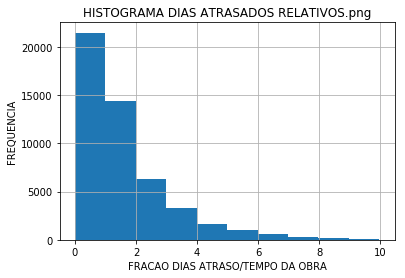

In [21]:
df4[(df4.DIAS_OBRA_INT>0) & (df4.DIAS_ATRASO_REL<10)]['DIAS_ATRASO_REL'].hist()
plt.xlabel('FRACAO DIAS ATRASO/TEMPO DA OBRA')
plt.ylabel('FREQUENCIA')
plt.title('HISTOGRAMA DIAS ATRASADOS RELATIVOS.png')
plt.savefig('HISTOGRAMA_DIAS_ATRASADO_REL.png')

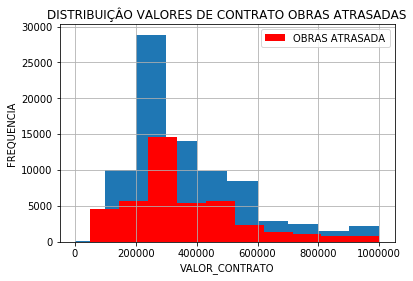

In [22]:
df1[(df1.VL_GLOBAL_CONV<10**6)]['VL_GLOBAL_CONV'].hist()
df4[(df4.VL_GLOBAL_CONV<10**6)]['VL_GLOBAL_CONV'].hist(color='red',label='OBRAS ATRASADA')
plt.ylabel('FREQUENCIA')
plt.xlabel('VALOR_CONTRATO')
plt.title('DISTRIBUIÇÂO VALORES DE CONTRATO OBRAS ATRASADAS')
plt.legend()
plt.savefig('HIST_OBRAS_TODOS_VALORES_CONV.png')

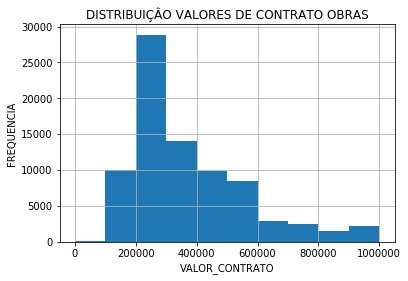

In [23]:
df1[(df1.VL_GLOBAL_CONV<10**6)]['VL_GLOBAL_CONV'].hist()
plt.ylabel('FREQUENCIA')
plt.xlabel('VALOR_CONTRATO')
plt.title('DISTRIBUIÇÂO VALORES DE CONTRATO OBRAS')
plt.savefig('HIST_OBRAS_VALORES_CONV.png')

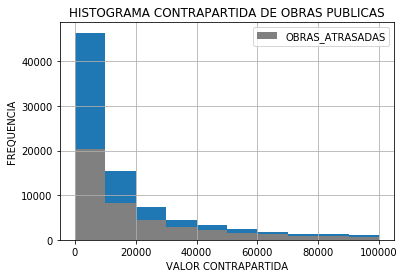

In [24]:
df1[(df1.VL_CONTRAPARTIDA_CONV<10**5)]['VL_CONTRAPARTIDA_CONV'].hist()
#df1.VL_CONTRAPARTIDA_CONV.describe()
df4[(df4.VL_CONTRAPARTIDA_CONV<10**5)]['VL_CONTRAPARTIDA_CONV'].hist(label='OBRAS_ATRASADAS',color='gray')
plt.xlabel('VALOR CONTRAPARTIDA')
plt.ylabel('FREQUENCIA')
plt.legend()
plt.title('HISTOGRAMA CONTRAPARTIDA DE OBRAS PUBLICAS')
plt.savefig('HIST_CONTRAPARTIDA_CONV.png')

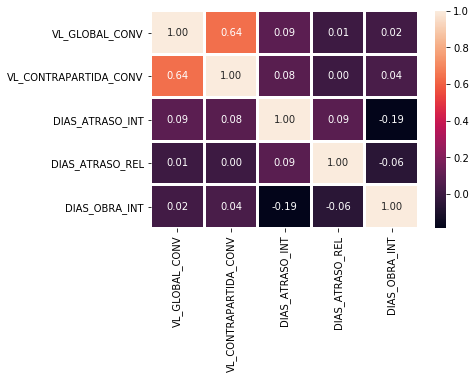

In [25]:
corr=df4[['VL_GLOBAL_CONV','VL_CONTRAPARTIDA_CONV','DIAS_ATRASO_INT','DIAS_ATRASO_REL','DIAS_OBRA_INT']].corr()

sns_plot=sns.heatmap(corr, annot=True, fmt='.2f', linewidths=2)
fig=sns_plot.get_figure()
fig.savefig("CORRELACAO_VALOR_DIAS_ATRASO.png",bbox_inches="tight")


In [26]:
df1.loc[(df3.DIA_FIM_VIGENC_CONV>df3.DIA_FIM_VIGENC_ORIGINAL_CONV), 'ATRASADA'] = 1
df1.loc[(df3.DIA_FIM_VIGENC_CONV<=df3.DIA_FIM_VIGENC_ORIGINAL_CONV), 'ATRASADA'] = 0


In [27]:
df1.to_csv('OBRAS_TOTAIS_ID_ATRASO.csv',index=False)
df4.to_csv('OBRAS_ATRASADA_INFO1.csv',index=False)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93894 entries, 0 to 93893
Data columns (total 11 columns):
NR_CONVENIO                     93894 non-null int64
ID_PROPOSTA                     93894 non-null int64
MES                             81332 non-null float64
ANO                             81332 non-null float64
DIA_INIC_VIGENC_CONV            93894 non-null datetime64[ns]
DIA_FIM_VIGENC_CONV             93894 non-null datetime64[ns]
DIA_FIM_VIGENC_ORIGINAL_CONV    93894 non-null datetime64[ns]
VL_GLOBAL_CONV                  93894 non-null float64
VL_CONTRAPARTIDA_CONV           93894 non-null float64
TIPO_DESPESA_ITEM               93894 non-null object
ATRASADA                        93894 non-null float64
dtypes: datetime64[ns](3), float64(5), int64(2), object(1)
memory usage: 8.6+ MB


In [32]:
df1.pivot_table(index='NR_CONVENIO',columns='ATRASADA',values='VL_GLOBAL_CONV')

ATRASADA,0.0,1.0
NR_CONVENIO,,
700359,NaN,18969101.28
700422,2310707.28,NaN
700490,NaN,679616.99
700491,NaN,213409.71
700494,NaN,154640.00
700496,NaN,103744.00
700497,NaN,268387.89
700513,353535.35,NaN
700516,404040.40,NaN
